In [ ]:
import sympy as sp

def compute_derivatives():
     # Nhập số biến
     n = int(input("Nhập số biến n: "))

     # Khởi tạo biến x1, x2, ..., xn
     x = sp.symbols(f'x1:{n+1}')

     # Nhập hàm số dưới dạng chuỗi và chuyển thành biểu thức SymPy
     f_expr = input("Nhập hàm số f(x1, x2, ..., xn): ")
     f = sp.sympify(f_expr)

     # Tính Gradient
     grad = [sp.diff(f, xi) for xi in x]
     grad_vector = sp.Matrix(grad)

     #Tinh Hessian
     hessian = sp.Matrix([[sp.diff(grad[i], x[j]) for j in range(n)] for i in range(n)])


     print("\nGradient (∇f):")
     sp.pprint(grad_vector)

     print("\nHessian (∇^2f):")
     sp.pprint(hessian)
compute_derivatives()


Gradient (∇f):
⎡2⋅x₁ - 2⋅x₂ ⎤
⎢            ⎥
⎣-2⋅x₁ + 4⋅x₂⎦

Hessian (∇^2f):
⎡2   -2⎤
⎢      ⎥
⎣-2  4 ⎦



Dạo hàm riêng theo từng biến:
af/ax1 = 2*x1
af/ax2 = -2*x2

Điểm dừng:
Diem 1: {x1: 0, x2: 0}

Phân loại điểm dừng:
Điểm 1: {x1: 0, x2: 0}, Loại: Điểm yên ngựa


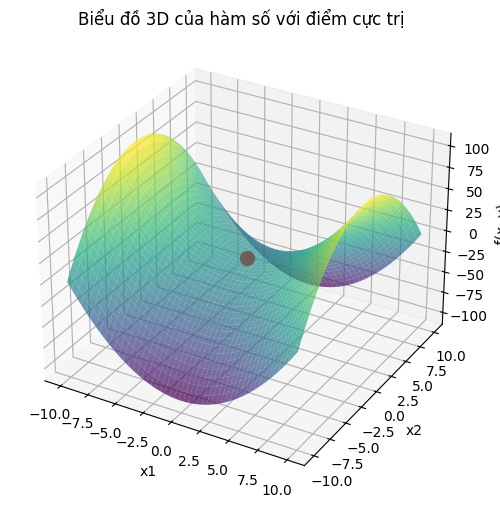

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Nhập số biển của hàm số
n = int(input("Nhập số biến của hàm số: "))

# Tạo danh sách biển
variables = sp.symbols(f'x1:{n+1}')

# Nhập hàm dưới dạng chuối
expr_str = input(f"Nhập hàm f({', '.join(map(str, variables) ) }): ")
expr = sp.sympify(expr_str) # Chuyển chuỗi thành biểu thức SymPy

# Tính đạo hàm riêng theo từng biên
gradient = [sp.diff(expr, var) for var in variables]

# Giải hệ phương trình vf = 0 để tìm điểm dừng
critical_points = sp.solve(gradient, variables, dict=True)

print("\nDạo hàm riêng theo từng biến:")
for var, grad in zip(variables, gradient):
    print(f"af/a{var} = {grad}")

print("\nĐiểm dừng:")
if not critical_points:
    print("Không có điểm dừng.")
else:
    for i, point in enumerate(critical_points, 1):
        print(f"Diem {i}: {point}")

    # Xác định loại điểm cực trị
    H = sp.hessian(expr, variables) # Ma tran Hessian
    print("\nPhân loại điểm dừng:")

    for i, point in enumerate(critical_points, 1):
        H_eval = H.subs(point) # Thay gia trị diem dừng vào Hessian
        H_np = np.array(H_eval).astype(np.float64) # Chuyển về ma trận số thực

        det_H = np. linalg.det(H_np) # Định thức của Hessian

        if det_H > 0:
            if H_np[0, 0] > 0:
                point_type = "Cuc tieu"
            else:
                point_type = "Cực đại"
        elif det_H < 0:
            point_type = "Điểm yên ngựa"
        else:
            point_type = "Khong xác định"

        print(f"Điểm {i}: {point}, Loại: {point_type}")

# Vẽ đồ thị nếu có thể
if n == 1:
    x = variables [0]
    f_lambdified = sp. lambdify(x, expr, 'numpy')

    x_vals = np. linspace(-10, 10, 400)
    y_vals = f_lambdified(x_vals)

    plt.plot(x_vals, y_vals, label=f'f({x}) = {expr}')

    # Vẽ điểm cực trị
    for point in critical_points:
        x_crit = float(point[x])
        y_crit = f_lambdified(x_crit)
        plt.scatter(x_crit, y_crit, color='red', marker='o', label="Cực trị")

    plt.xlabel(str(x))
    plt.ylabel('f(x)')
    plt. legend()
    plt.title("Biểu đổ 2D của hàm số")
    plt.grid()
    plt.show()

elif n == 2:
    x, y = variables [:2]
    f_lambdified = sp.lambdify((x, y), expr, 'numpy')

    x_vals = np.linspace(-10, 10, 50)
    y_vals = np. linspace(-10, 10, 50)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f_lambdified(X, Y)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Vẽ điểm cực trị
    for point in critical_points:
        x_crit, y_crit = float(point[x]), float(point[y])
        z_crit = f_lambdified(x_crit, y_crit)
        ax.scatter(x_crit, y_crit, z_crit, color='red', s=100, marker='o')

    ax.set_xlabel(str(x))
    ax.set_ylabel(str(y))
    ax.set_zlabel('f(x, y)')
    ax.set_title("Biểu đồ 3D của hàm số với điểm cực trị")
    plt.show()

else:
    print("\nkhông thể trực quan hóa hàm số với nhiều hơn 2 biến.")

In [ ]:
import sympy as sp

def main():
    # Bước 1: Nhập số dòng (m) và số cột (n)
    m = int(input ("Nhập số dòng m: "))
    n = int(input ("Nhập số cột n: "))

    # Bước 2: Nhập tên biến cho từng phần tử ma trận X
    # Tạo một cầu trúc lưu tên biến cho mỗi vị trí (1, j)
    variable_names = []
    for i in range(m):
        row_names = []
        for j in range(n):
            var_name = input(f"Nhập tên bien cho phần tu XI(i), {j}]: ")
            row_names.append(var_name)
        variable_names.append(row_names)

    # Tạo dict để ánh xạ "tên biến" -> "bien Symbol trong Sympy"
    var_dict = {}
    for i in range(m):
        for j in range(n):
            name = variable_names[i] [j]
            var_dict [name] = sp.Symbol(name, real=True)

    # Xây dựng ma tran Sympy X từ cac bien Symbol
    x_symbols = []
    for i in range(m):
        row = []
        for j in range(n):
            row.append(var_dict[variable_names[i] [j ] ])
        x_symbols.append(row)
    X = sp.Matrix(x_symbols)

    # Bước 3: Nhập biểu thức hàm f(X)
    print ("\nLuu ý: Hay dung ten bien ban vua dat cho cac phan tu. \n")
    f_str = input("Nhập biểu thức hàm f(X) : ")

    # Dùng sympify với var_dict để chuyển f_str thành biểu thức Sympy
    f_expr = sp.sympify(f_str, locals=var_dict)

    # Bước 4: Tính ma trận đạo hàm (gradient) af/ax
    gradient_matrix = sp.zeros(m, n)
    for i in range(m):
        for j in range(n):
            gradient_matrix[i, j] = sp.diff(f_expr, X[i, j])

    # Bước 5: In kết quả
    print("\n === Ket qua === ")
    print("Ma trận X:")
    sp.pprint(X)

    print("\nHàm f(X):")
    sp.pprint(f_expr)

    print("\nĐạo hàm (gradient) af/aX:")
    sp.pprint(gradient_matrix)

if __name__ == "__main__":
    main()


Luu ý: Hy dung dung ten bien ban vua dat cho cac phan tu. 


 === Ket qua === 
Ma trận X:
⎡x  y  z⎤
⎢       ⎥
⎣u  v  t⎦

Hàm f(X):
 2    2    2    2    2    2
t  + u  + v  + x  + y  + z 

Đạo hàm (gradient) af/aX:
⎡2⋅x  2⋅y  2⋅z⎤
⎢             ⎥
⎣2⋅u  2⋅v  2⋅t⎦


In [3]:
import sympy as sp

def main():
    # Bước 1: Nhập số chiều đầu vào m
    m = int(input("Nhập số chiều đầu vào m: "))
    # Tạo các biến x1, x2, ..., x_m
    x_symbols = sp.symbols('x1:' + str(m+1), real=True)
    
    # Bước 2: Nhập số chiều đầu ra n
    n = int(input("Nhập số chiều đầu ra n: "))
    
    print(f"\nCó {m} biến: {x_symbols}")
    print(f"Cần nhập {n} thành phần f_1, f_2, ..., f_{n} (mỗi thành phần là 1 hàm R^{m} -> R).")
    print("Ví dụ: x1 + x2, x1*x2, x1 - x2,...")
    
    # Bước 3: Nhập các thành phần f_j
    f_list = []
    for j in range(n):
        f_str = input(f"Nhập biểu thức cho f_{j+1}(x1, x2, ..., x{m}): ")
        # ensure the expression uses the correct variable names
        local_dict = {f'x{i+1}': x_symbols[i] for i in range(m)}
        f_expr = sp.sympify(f_str, locals=local_dict)
        f_list.append(f_expr)
    
    # Xây dựng vector-hàm f(x)
    f_vector = sp.Matrix(f_list)
    
    # Bước 4: Tính ma trận Jacobian (kích thước n x m)
    jacobian_matrix = sp.zeros(n, m)
    for i in range(n):
        for j in range(m):
            jacobian_matrix[i, j] = sp.diff(f_list[i], x_symbols[j])
    
    # Bước 5: In kết quả
    print("\n--- Vector-hàm f(x) ---")
    sp.pprint(f_vector)
    
    print("\n--- Ma trận Jacobian (n x m) ---")
    sp.pprint(jacobian_matrix)

if __name__ == "__main__":
    main()


Có 2 biến: (x1, x2)
Cần nhập 3 thành phần f_1, f_2, ..., f_3 (mỗi thành phần là 1 hàm R^2 -> R).
Ví dụ: x1 + x2, x1*x2, x1 - x2,...

--- Vector-hàm f(x) ---
⎡x₁ + x₂⎤
⎢       ⎥
⎢ x₁⋅x₂ ⎥
⎢       ⎥
⎣x₁ - x₂⎦

--- Ma trận Jacobian (n x m) ---
⎡1   1 ⎤
⎢      ⎥
⎢x₂  x₁⎥
⎢      ⎥
⎣1   -1⎦
